In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c iuss-23-24-automatic-diagnosis-breast-cancer -p /content/data


 90% 264M/293M [00:00<00:00, 219MB/s]
100% 293M/293M [00:02<00:00, 103MB/s]


In [ ]:
!unzip -q /content/data/*.zip -d /content/data


In [ ]:
!ls /content/data


complete_set  iuss-23-24-automatic-diagnosis-breast-cancer.zip	training_set


In [ ]:
!unzip -q /content/data/iuss-23-24-automatic-diagnosis-breast-cancer.zip -d /content/data


replace /content/data/complete_set/testing_set/P001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -q /content/data/iuss-23-24-automatic-diagnosis-breast-cancer.zip -d /content/data


replace /content/data/complete_set/testing_set/P001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!yes | unzip -q -o /content/data/iuss-23-24-automatic-diagnosis-breast-cancer.zip -d /content/data


In [ ]:
!ls /content/data
!ls /content/data/complete_set
!ls /content/data/training_set


complete_set  iuss-23-24-automatic-diagnosis-breast-cancer.zip	training_set
testing_set  training_set
benign	malignant


In [ ]:
!ls /content/data/training_set | head
!ls /content/data/complete_set | head
!ls /content/data/benign | head
!ls /content/data/malignant | head


benign
malignant
testing_set
training_set
ls: cannot access '/content/data/benign': No such file or directory
ls: cannot access '/content/data/malignant': No such file or directory


In [ ]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Step 2: Load breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Show first few rows
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Step 3: Split data into train and test sets
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 5: Make predictions and evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


✅ Model Performance:
Accuracy: 0.9561
F1 Score: 0.9655

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



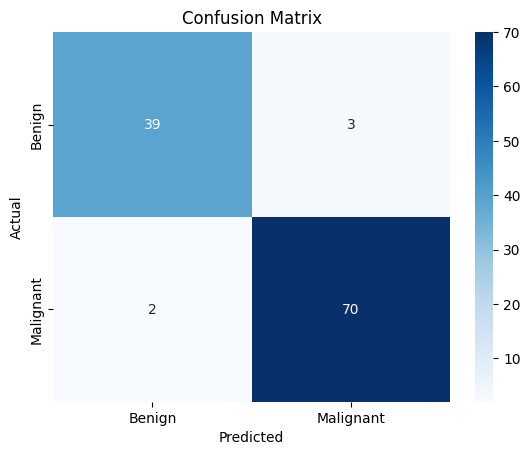

In [ ]:
# Step 6: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


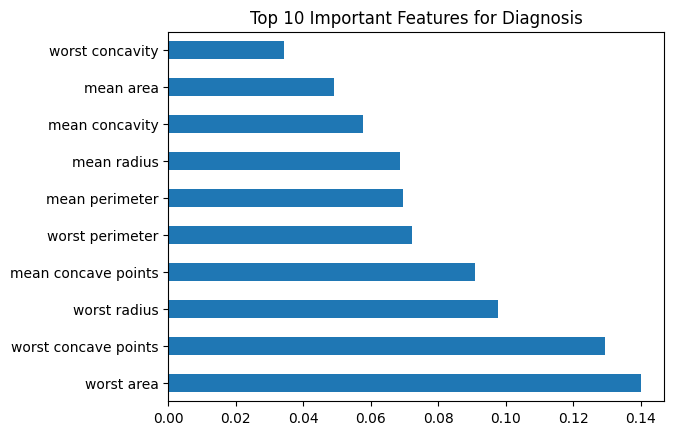

In [ ]:
# Step 7: View most important features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features for Diagnosis")
plt.show()
